## Data Introduction
The Consumer Behavior Dataset contains 4k pieces of specific information providing comprehensive insights into consumers' preferences, tendencies, and patterns during their shopping experiences. This dataset encompasses a diverse range of variables, including demographic information, purchase history, product preferences, shopping frequency and customer character Description. Analyzing this dataset will help us to better understand the mechanisms by which consumer characteristics and behaviors influence sales, and the number of sales.

Our project will follow the analysis steps below:

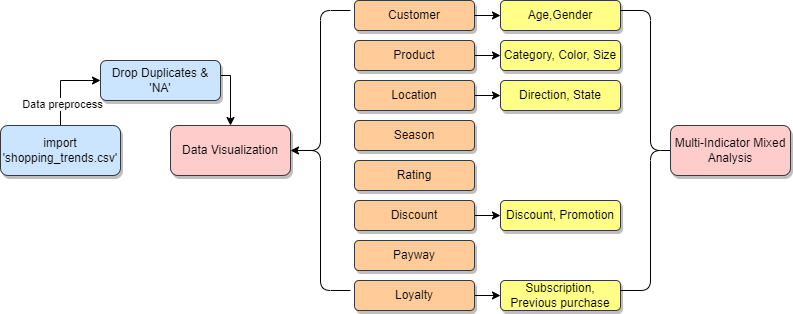

## 1. Data Processing

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("shopping_trends.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df=df.drop(columns='Customer ID')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       3900 non-null   int64  
 1   Gender                    3900 non-null   object 
 2   Item Purchased            3900 non-null   object 
 3   Category                  3900 non-null   object 
 4   Purchase Amount (USD)     3900 non-null   int64  
 5   Location                  3900 non-null   object 
 6   Size                      3900 non-null   object 
 7   Color                     3900 non-null   object 
 8   Season                    3900 non-null   object 
 9   Review Rating             3900 non-null   float64
 10  Subscription Status       3900 non-null   object 
 11  Payment Method            3900 non-null   object 
 12  Shipping Type             3900 non-null   object 
 13  Discount Applied          3900 non-null   object 
 14  Promo Co

In [5]:
# check for duplicate rows and missing value
df.isnull().sum()

Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [6]:
duplicates = df.duplicated()
df[duplicates]

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


In [69]:
df.shape

(3900, 20)

## 2. Data Visualization

In [6]:
sns.set(palette="hls")
sns.set_style("darkgrid")
plt.rcParams['image.cmap'] = 'hls'

### 2.1 Customer Analysis

In [7]:
#Age
df['Agegroup'] = pd.cut(df['Age'], bins=[0,20,30,40, 50, 60, np.inf], labels=['<20','20-30','30-40', '40-50', '50-60', '60+'])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\2444899942.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby('Agegroup')[['Purchase Amount (USD)']].sum()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\2444899942.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Agegroup', y='Purchase Amount (USD)', data=df1, ci=None)
d:\ECA5307\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '<20'),
  Text(1, 0, '20-30'),
  Text(2, 0, '30-40'),
  Text(3, 0, '40-50'),
  Text(4, 0, '50-60'),
  Text(5, 0, '60+')])

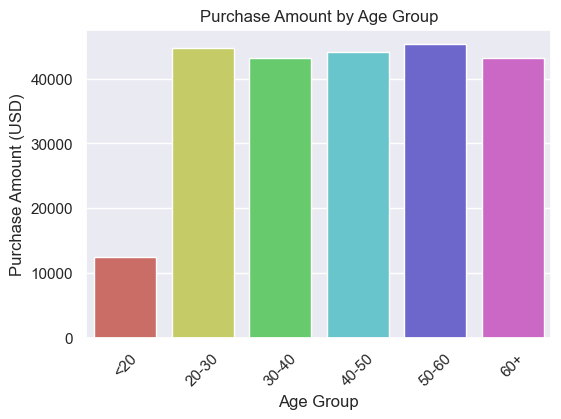

In [8]:
df1=df.groupby('Agegroup')[['Purchase Amount (USD)']].sum()
df1=df1.reset_index()# create a new index
plt.figure(figsize=(6, 4))
sns.barplot(x='Agegroup', y='Purchase Amount (USD)', data=df1, ci=None)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)  # Rotate the x labels to show them better

This graph shows the purchasing power of consumers in different age groups. The purchasing power of those below 20 years old is weakest as they are less financially independent. The 20-30 year olds have one of the highest purchasing power, which may be mainly due to the fact that this group is younger, more focused on outward appearance, and has the highest frequency of product changes, as well as the fact that this group is financially independent. There is a small drop in comparison to the 30-40 year olds. The 40-50 year old group gradually picks up. The 50-60 year olds having the highest purchasing power, is one of the key customer groups, possibly reflecting a peak in career earnings or possibly a shift in spending to higher quality or higher priced items. However, the post 60+ group has seen a greater fall in the amount of money purchased.

Loyalty programmes should be implemented for the 20-30 and 50-60 focus customer groups to encourage repeat purchases and to increase the LTV of customers.For the 60+ customer group, which has more disposable income and therefore a high potential for growth, products can be developed that specifically cater to the needs and preferences of this group, thus increasing the amount of money purchased by this group.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\2357099361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Agegroup', 'Frequency of Purchases'])['Purchase Amount (USD)'].sum().reset_index()
d:\ECA5307\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\ECA5307\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the

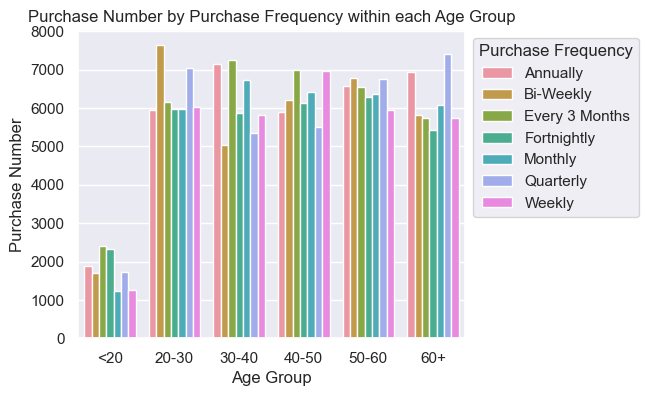

In [101]:
grouped_data = df.groupby(['Agegroup', 'Frequency of Purchases'])['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(5, 4))
sns.barplot(x='Agegroup', y='Purchase Amount (USD)', hue='Frequency of Purchases', data=grouped_data)
plt.title('Purchase Number by Purchase Frequency within each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Number')
plt.legend(title='Purchase Frequency',loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

For one of the largest customer groups: the 20-30 year old customer group,'Bi-Weekly' is the most prominent shopping frequency, indicating a high overall frequency of consumption.It is the same as in the previous analysis: the product life cycle in this group is relatively short. For this customer group, the speed of product development can be increased, e.g., the speed of iteration of clothing styles can be increased in order to increase the repurchase rate.

Another larger customer group, the 50-60 year olds, has a more even distribution of purchasing frequency, so flexible inventory management is needed to adapt to various purchasing frequencies and ensure supply chain efficiency and responsiveness. In addition, the frequency of low-frequency buyers can be gradually increased by adding more touchpoints.

For the 60+ customer group, it can be seen that 'annuallly' and 'Quarterly' are the most prominent, indicating that the consumption frequency of this group is relatively low. They are more inclined to buy products with high quality and low replacement frequency. Therefore, this group can be targeted with high quality and high price products. At the same time explore whether there are ways to stimulate the frequency of purchase.

Text(0.5, 1.0, 'Purchase Amount by Gender')

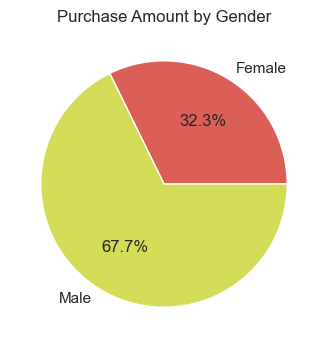

In [40]:
#Gender
purchase_gender=df.groupby('Gender')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(4,4))
plt.pie(purchase_gender, autopct = '%1.1f%%', labels = purchase_gender.index)
plt.title('Purchase Amount by Gender')

The pie chart displays the distribution of purchase amounts by gender, showing that 67.7% of the total purchase amount comes from male customers, while 32.3% comes from female customers.This could suggest that the products offered are more appealing to men or that men are spending more on average than women.

The business may consider revisiting its marketing strategy to better target female customers and balance the distribution of spending between genders. This could involve analyzing product offerings, marketing messages, and channels to ensure they resonate with a female audience.

### 2.2 Product Category and Features

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9896\442814473.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Accessories'),
  Text(2, 0, 'Footwear'),
  Text(3, 0, 'Outerwear')])

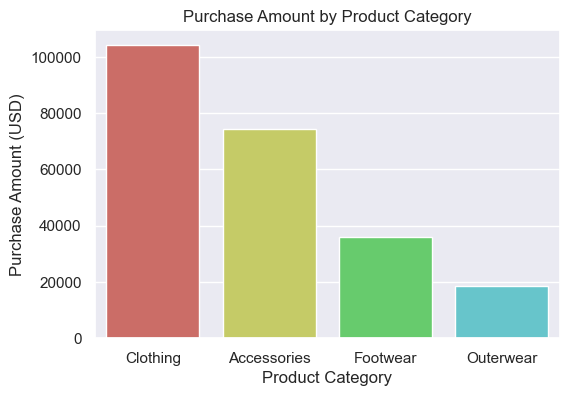

In [41]:
df1=df.groupby('Category')[['Purchase Amount (USD)']].sum()
df1=df1.reset_index()# create a new index
df1.head()
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)
plt.title('Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=0) 

The chart illustrates the distribution of purchase amounts across different product categories. Clothing leads with the highest purchase amount, indicating a strong preference among consumers for this category. Accessories follow as the second-highest category, popular among customers, but with significantly lower purchase volumes compared to clothing. Footwear shows a moderate purchase amount, suggesting a smaller market share compared to clothing and accessories. Outerwear has the lowest purchase amount, potentially reflecting seasonal buying patterns, higher unit prices, or reduced consumer interest.

This figure suggests that companies should focus on clothing and accessories, optimizing inventory and allocating marketing resources accordingly. Given the lower sales volume of outerwear, market research might be needed to understand the underlying reasons and develop targeted marketing campaigns during peak seasons to boost sales. Meanwhile, considering the moderate sales volume of footwear, expanding this product line could be beneficial if it has higher profit margins or if there is an untapped market opportunity.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\3884859913.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Blouse'),
  Text(1, 0, 'Shirt'),
  Text(2, 0, 'Dress'),
  Text(3, 0, 'Pants'),
  Text(4, 0, 'Jewelry'),
  Text(5, 0, 'Sunglasses'),
  Text(6, 0, 'Belt'),
  Text(7, 0, 'Scarf'),
  Text(8, 0, 'Sweater'),
  Text(9, 0, 'Shorts'),
  Text(10, 0, 'Skirt'),
  Text(11, 0, 'Hat'),
  Text(12, 0, 'Coat'),
  Text(13, 0, 'Socks'),
  Text(14, 0, 'Jacket'),
  Text(15, 0, 'T-shirt'),
  Text(16, 0, 'Shoes'),
  Text(17, 0, 'Sandals'),
  Text(18, 0, 'Boots'),
  Text(19, 0, 'Handbag'),
  Text(20, 0, 'Hoodie'),
  Text(21, 0, 'Backpack'),
  Text(22, 0, 'Sneakers'),
  Text(23, 0, 'Gloves'),
  Text(24, 0, 'Jeans')])

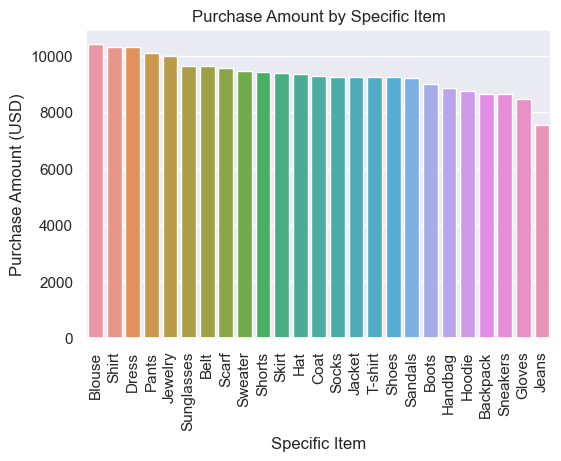

In [35]:
df1=df.groupby('Item Purchased')[['Purchase Amount (USD)']].sum()
df1=df1.reset_index()# create a new index
df1.head()
plt.figure(figsize=(6, 4))
sns.barplot(x='Item Purchased', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)
plt.title('Purchase Amount by Specific Item')
plt.xlabel('Specific Item')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90) 

This bar chart details the purchase amount by specific items, displaying a range of products and their respective sales figures.The items are broadly distributed across the spectrum concerning purchase amounts. Blouses, dresses, and shirts appear to be the leading items in sales, whereas handbags, backpacks, and different types of jeans are on the lower end of the sales spectrum. This spread indicates a diverse product interest among consumers, with particular strength in the top-selling items which are staples in many wardrobes.

The dominance of blouses, dresses, and shirts suggests that focusing on these items could be profitable, ensuring that stock levels meet demand and that there are a variety of styles and sizes available. The lower sales figures for handbags and backpacks may indicate a need for a review of these lines—potentially looking at pricing, style selection, or marketing efforts. For the various types of jeans, considering their fashion staple status, it may be beneficial to investigate why they are lagging in sales; this could involve customer feedback, competitive analysis, and reviewing product placement and promotion.

One point to note！！！
women's shirts and dresses and jewellery have the highest sales, but men's spending is much larger in the gender distribution of sales, which suggests that there is a possibility that men may be contributing a significant portion of the sales when purchasing a gift for a woman, which is especially common during special holidays or occasions. If this is indeed the consumption structure, the marketing strategy is quite different from what we have previously proposed to attract female consumers. Next, we will analyse the gender ratio of purchases of women's shirts, dresses and jewellery:

Text(0.5, 1.0, 'Dress Purchase Amount by Gender')

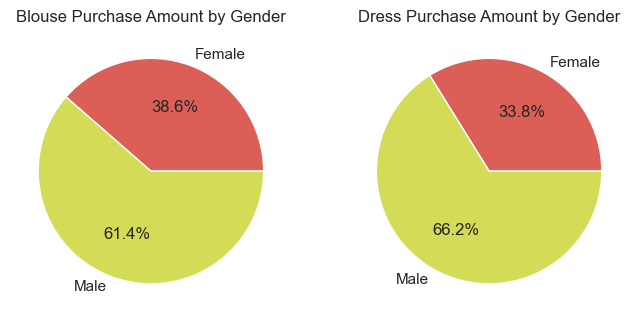

In [22]:
blouse=df[df['Item Purchased']=='Blouse']
df1=blouse.groupby('Gender')['Purchase Amount (USD)'].sum()
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,2,1)
ax1.pie(df1, autopct = '%1.1f%%', labels = df1.index)
plt.title('Blouse Purchase Amount by Gender')

dress=df[df['Item Purchased']=='Dress']
df2=dress.groupby('Gender')['Purchase Amount (USD)'].sum()
ax2=fig.add_subplot(1,2,2)
ax2.pie(df2, autopct = '%1.1f%%', labels = df2.index)
plt.title('Dress Purchase Amount by Gender')

This pie chart validates our conjecture that most of the women's goods are paid for by men, and that's why men have the highest percentage of spending money. So based on this analysis, we propose several new marketing strategy below:

Gift Purchasing Options: Offer easy-to-navigate gift purchasing options, including gift cards, gift wrapping services, and personalized recommendations.

Seasonal Marketing: Launch special marketing campaigns targeting men who may buy gifts for women during key shopping holidays like Valentine's Day, Mother's Day, Christmas, etc.

Promotional Campaigns: Implement couple-based promotions, such as "buy one, get one free" or "couples discounts," aimed at attracting both male and female customers.

Market Research: Conduct customer research to understand the decision factors and preferences of male customers when purchasing products for women.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9896\2083310093.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['Category', 'Agegroup'])['Purchase Amount (USD)'].sum().reset_index()


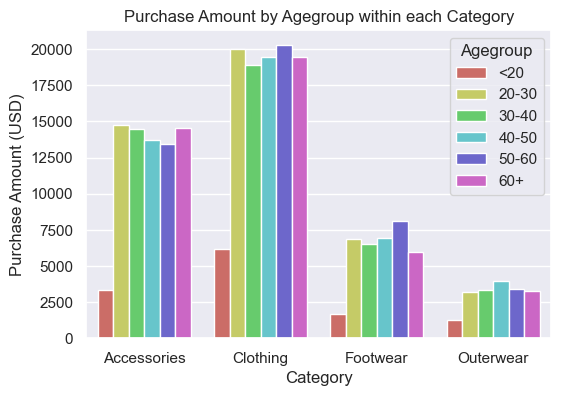

In [43]:
grouped_data = df.groupby(['Category', 'Agegroup'])['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Agegroup', data=grouped_data)
plt.title('Purchase Amount by Agegroup within each Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Agegroup')
plt.show()

The provided bar chart depicts the purchase amount within each product category, broken down by age groups.For Accessories, The 30-30 age group appears to be the largest spender, with purchase amounts decreasing as the age increases,however the amounts increase suddenly in 60+ age group.For Clothing, This category shows the highest purchase amounts across all age groups, with the 50-60 age group leading, followed closely by the 20-30 age groups. For Footwear, The 50-60 age group spends more than other age groups clearly.For Outerwear, the 40-50 age group stands out as the highest spender.

Marketing initiatives should be tailored according to age-specific preferences, with a focus on the 50-60 age groups for clothing and footwear, and on the 20-30 and 60+ age group for accessories.Outerwear's overall sales are low and it should focus on developing sales strategies that capitalize on the preferences of customers in the 40-50 age group to increase sales. 

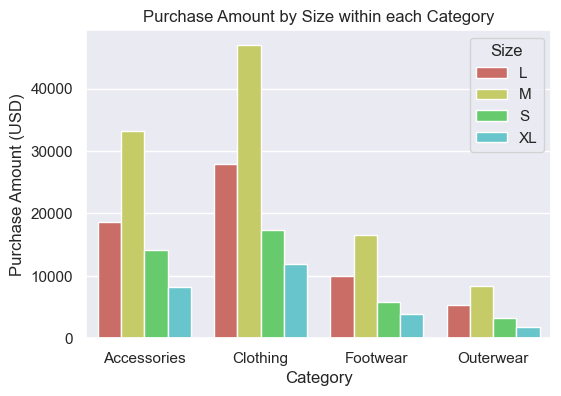

In [28]:
# by size
grouped_data = df.groupby(['Category', 'Size'])['Purchase Amount (USD)'].sum().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Category', y='Purchase Amount (USD)', hue='Size', data=grouped_data)
plt.title('Purchase Amount by Size within each Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Size')
plt.show()

The bar chart presents the purchase amounts categorized by product size within each product category.In every category, size M is the most popular, with much higher sales amounts than other sizes, then followed by Size L, S, and XL.

Given the popularity of sizes M and L in clothing and footwear, it's essential to ensure that stock levels for these sizes are sufficient to meet demand. Tailor marketing efforts to highlight the availability of popular sizes, and consider special promotions for sizes with lower sales to increase turnover.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\872511548.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Color', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Green'),
  Text(1, 0, 'Teal'),
  Text(2, 0, 'Yellow'),
  Text(3, 0, 'Olive'),
  Text(4, 0, 'Cyan'),
  Text(5, 0, 'Violet'),
  Text(6, 0, 'Gray'),
  Text(7, 0, 'Silver'),
  Text(8, 0, 'Black'),
  Text(9, 0, 'Maroon'),
  Text(10, 0, 'Orange'),
  Text(11, 0, 'Charcoal'),
  Text(12, 0, 'Pink'),
  Text(13, 0, 'Purple'),
  Text(14, 0, 'White'),
  Text(15, 0, 'Beige'),
  Text(16, 0, 'Peach'),
  Text(17, 0, 'Red'),
  Text(18, 0, 'Lavender'),
  Text(19, 0, 'Magenta'),
  Text(20, 0, 'Blue'),
  Text(21, 0, 'Gold'),
  Text(22, 0, 'Brown'),
  Text(23, 0, 'Indigo'),
  Text(24, 0, 'Turquoise')])

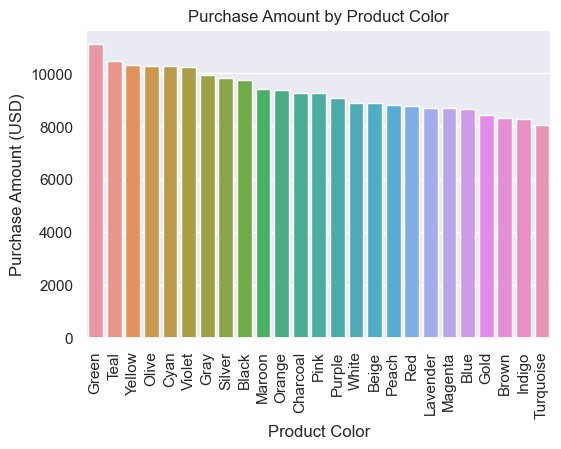

In [33]:
df1=df.groupby('Color')[['Purchase Amount (USD)']].sum()
df1=df1.reset_index()# create a new index
df1.head()
plt.figure(figsize=(6, 4))
sns.barplot(x='Color', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)
plt.title('Purchase Amount by Product Color')
plt.xlabel('Product Color')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90) 

The colors are almost uniformly distributed in terms of purchase amounts, with green slightly leading. This uniformity suggests that there is no single dominant color preference among consumers, which can indicate a diverse customer base with varied tastes. The close competition among the colors could also imply that consumers are purchasing items across a spectrum of colors rather than sticking to traditional favorites.

Maintaining a wide variety of colors in the product lineup may continue to appeal to a broad customer base. Monitor color trends closely, as shifts in fashion and seasonal preferences can change the popularity of colors quickly. Balance inventory across the color spectrum to prevent overstocking of less popular colors and to ensure that popular colors are readily available.

In the chart below, I have listed the top 5 colors in terms of sales and found that regardless of the season, it is the five colors 'black', 'Brown', 'Beige', 'Blue', 'Charcoal' that are the most popular, with the internal order varying from season to season. Stock management of colors can use this as a reference.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\2367432184.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Color', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None,ax=ax1)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\2367432184.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Color', y='Purchase Amount (USD)', data=df2.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None,ax=ax2)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\2367432184.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Color', y='Purchase Amount (USD)', data=df3.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None,ax=ax3)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\2367432184.py:33: FutureWarning: 

The `ci` parameter is deprecat

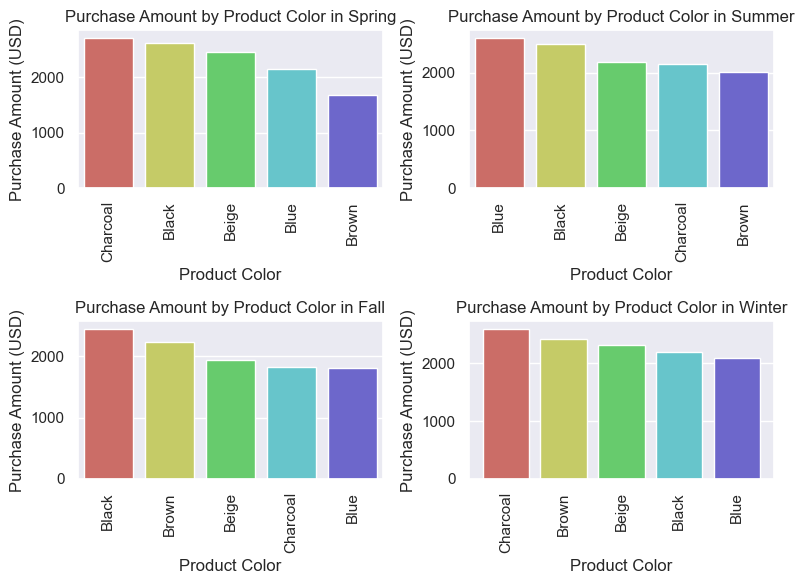

In [43]:
spring=df[df['Season']=='Spring']
summer=df[df['Season']=='Summer']
fall=df[df['Season']=='Fall']
winter=df[df['Season']=='Winter']
df1=spring.groupby('Color')['Purchase Amount (USD)'].sum().reset_index().head(5)
df2=summer.groupby('Color')['Purchase Amount (USD)'].sum().reset_index().head(5)
df3=fall.groupby('Color')['Purchase Amount (USD)'].sum().reset_index().head(5)
df4=winter.groupby('Color')['Purchase Amount (USD)'].sum().reset_index().head(5)

fig=plt.figure(figsize=(8, 6))
ax1=fig.add_subplot(2,2,1)
sns.barplot(x='Color', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None,ax=ax1)
plt.title('Purchase Amount by Product Color in Spring')
plt.xlabel('Product Color')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90) 

ax2=fig.add_subplot(2,2,2)
sns.barplot(x='Color', y='Purchase Amount (USD)', data=df2.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None,ax=ax2)
plt.title('Purchase Amount by Product Color in Summer')
plt.xlabel('Product Color')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90) 

ax3=fig.add_subplot(2,2,3)
sns.barplot(x='Color', y='Purchase Amount (USD)', data=df3.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None,ax=ax3)
plt.title('Purchase Amount by Product Color in Fall')
plt.xlabel('Product Color')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90) 

ax4=fig.add_subplot(2,2,4)
sns.barplot(x='Color', y='Purchase Amount (USD)', data=df4.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None,ax=ax4)
plt.title('Purchase Amount by Product Color in Winter')
plt.xlabel('Product Color')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=90) 

plt.autoscale()
plt.tight_layout()

### 2.3 Location

In [44]:
!pip install folium
!pip install geopy

In [7]:
import folium
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import Nominatim

unique_locations = df['Location'].unique()
location_coords = {}

import time
from geopy.extra.rate_limiter import RateLimiter

# Using RateLimiter to control request frequency
geolocator = Nominatim(user_agent="geoapiExercises", timeout=10)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

for location in unique_locations:
    try:
        geo_location = geocode(location)
        if geo_location:
            location_coords[location] = (geo_location.latitude, geo_location.longitude)
    except Exception as e:
        print(f"Error encoding location {location}: {e}")


# Make sure all the coordinates are valid
df['coords'] = df['Location'].apply(lambda x: location_coords.get(x))

# Keep only the rows with valid coordinates
valid_data = df.dropna(subset=['coords'])

# List of latitude, longitude and purchase amounts
heat_data = [[row['coords'][0], row['coords'][1], row['Purchase Amount (USD)']] for index, row in valid_data.iterrows()]

# Creating a base map
map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)  # 美国地理中心的坐标

# Adding a Heat Layer
HeatMap(heat_data).add_to(map)

In [8]:
map

The heat map shows concentrated sales activity in the Northeastern United States, particularly around the New York area, indicated by the red and orange colors that signify higher sales volumes.The West Coast, particularly in California, and the Southern states show moderate to high levels of activity, with the intensity decreasing as it moves inland.There are isolated areas of activity, potentially major cities, that stand out in Alaska and Hawaii, indicating significant market engagement in these locales.

The high levels of activity in the Northeast and along the West Coast could be further capitalized on with focused marketing campaigns, potentially increasing the customer base in these economically vibrant regions.The isolated hotspots could represent areas where market presence is strong but could benefit from expansion efforts or increased marketing to grow the customer base.The low activity in central North America suggests either an untapped market potential or a need for increased brand awareness and penetration efforts.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\3309683970.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'Alabama'),
  Text(2, 0, 'Alaska'),
  Text(3, 0, 'Arkansas'),
  Text(4, 0, 'Delaware'),
  Text(5, 0, 'Georgia'),
  Text(6, 0, 'Arizona'),
  Text(7, 0, 'Connecticut'),
  Text(8, 0, 'Colorado'),
  Text(9, 0, 'Florida')])

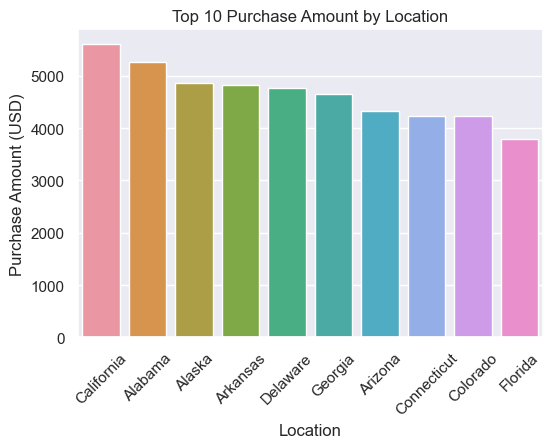

In [108]:
df1=df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index().head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x='Location', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)
plt.title('Top 10 Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45) 

The bar chart lists the top 10 locations by purchase amount, with California leading, followed by Alabama, Alaska, and others. The purchase amounts are relatively close in value, suggesting a competitive market across these top-performing states.

### 2.4 Season Factors

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\1976945200.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Fall'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Winter'),
  Text(3, 0, 'Summer')])

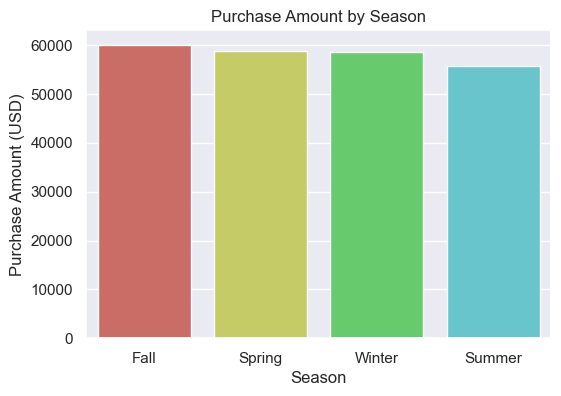

In [37]:
df1=df.groupby('Season')['Purchase Amount (USD)'].sum()
df1=df1.reset_index()# create a new index
df1.head()
plt.figure(figsize=(6, 4))
sns.barplot(x='Season', y='Purchase Amount (USD)', data=df1.sort_values(by='Purchase Amount (USD)',ascending=False), ci=None)
plt.title('Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=0) 

The bar chart displays the purchase amounts by season, with each bar representing a different season of the year. The purchase amounts are fairly consistent across all seasons, with a slight variation. Fall shows the highest purchase amount, followed by Spring, Winter, and Summer, which has the lowest, yet still comparable, purchase amount.

Plan inventory with a consistent supply throughout the year, with a slight increase before the Fall season to accommodate the peak.

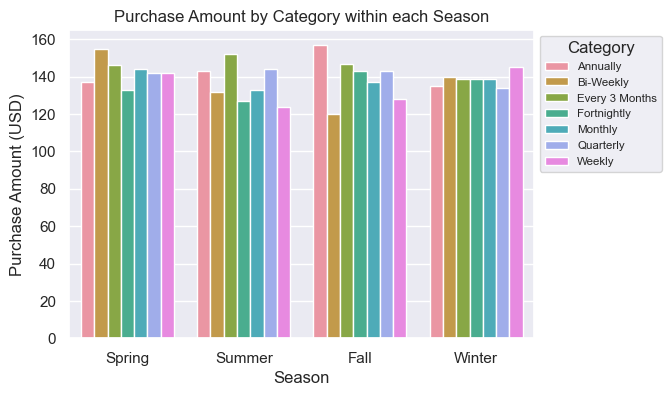

In [89]:
grouped_data = df.groupby(['Season', 'Frequency of Purchases'])['Purchase Amount (USD)'].count().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='Season', y='Purchase Amount (USD)', hue='Frequency of Purchases', data=grouped_data,order=season_order)
plt.title('Purchase Amount by Category within each Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Category', loc='upper left', bbox_to_anchor=(1, 1), fontsize='x-small')
plt.show()

The bar chart details the purchase amount by frequency category within each season. All seasons display a similar distribution pattern across the different purchase frequencies, with no single category or season showing a dramatically higher purchase amount than others. 

The uniformity across seasons and purchase frequencies suggests that customers have a steady purchasing habit that does not significantly change with seasons.Marketing efforts can be consistently applied throughout the year. However, subtle seasonal marketing could still be beneficial to cater to any slight variations.For example, the shopping frequency in Fall has more 'Annually', which means lower frequency.

### 2.5 Rating

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\1942451921.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby('ratinggroup')[['Purchase Amount (USD)']].count()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\1942451921.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ratinggroup', y='Purchase Amount (USD)', data=df1, ci=None)
d:\ECA5307\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


(array([0, 1, 2, 3]),
 [Text(0, 0, '<2'), Text(1, 0, '2-3'), Text(2, 0, '3-4'), Text(3, 0, '4-5')])

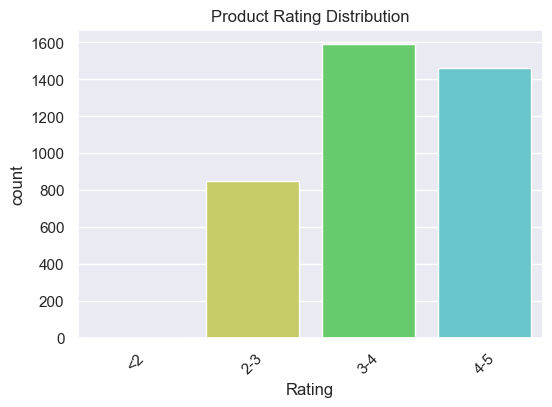

In [44]:
df['ratinggroup'] = pd.cut(df['Review Rating'], bins=[0,2,3,4,np.inf], labels=['<2','2-3','3-4', '4-5'])
df1=df.groupby('ratinggroup')[['Purchase Amount (USD)']].count()
df1=df1.reset_index()# create a new index
plt.figure(figsize=(6, 4))
sns.barplot(x='ratinggroup', y='Purchase Amount (USD)', data=df1, ci=None)
plt.title('Product Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('count')
plt.xticks(rotation=45)

The bar chart illustrates the distribution of product ratings, showing the count of products within each rating category. Products rated 3-4 have the highest count, closely followed by those rated 4-5. There are fewer products with ratings of 2-3 and significantly fewer with a rating below 2. This indicates that the majority of products have favorable ratings from customers.

The presence of products in the 2-3 rating range, while fewer, points to potential areas for improvement. Understanding why these products are rated lower and addressing those issues could improve customer satisfaction and sales.

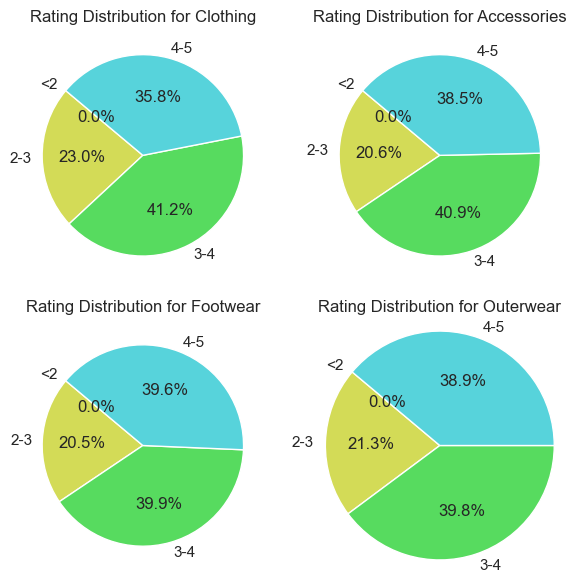

In [55]:
df1 = df[df['Category'] == 'Clothing']
df1 = df1['ratinggroup'].value_counts().sort_index()
df2 = df[df['Category'] == 'Accessories']
df2 = df2['ratinggroup'].value_counts().sort_index()
df3 = df[df['Category'] == 'Footwear']
df3 = df3['ratinggroup'].value_counts().sort_index()
df4 = df[df['Category'] == 'Outerwear']
df4 = df4['ratinggroup'].value_counts().sort_index()

fig=plt.figure(figsize=(6, 6))
ax1=fig.add_subplot(2,2,1)
ax1.pie(df1, labels=df1.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution for Clothing')

ax2=fig.add_subplot(2,2,2)
ax2.pie(df2, labels=df2.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution for Accessories')

ax3=fig.add_subplot(2,2,3)
ax3.pie(df3, labels=df3.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution for Footwear')

ax4=fig.add_subplot(2,2,4)
ax4.pie(df4, labels=df4.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Distribution for Outerwear')

plt.autoscale()
plt.tight_layout()
plt.show()

The pie charts represent customer ratings distribution across four categories.Clothing and Outwear have similar profiles with over a fifth of products falling into the 2-3 rating range, indicating potential quality issues. In contrast, Accessories and Footwear have a higher proportion of products with 4-5 ratings, showing greater customer satisfaction.For products with ratings falling in the 2-3 range, focus on verifying the reasons for the low ratings.

### 2.6 Discount and Promotion

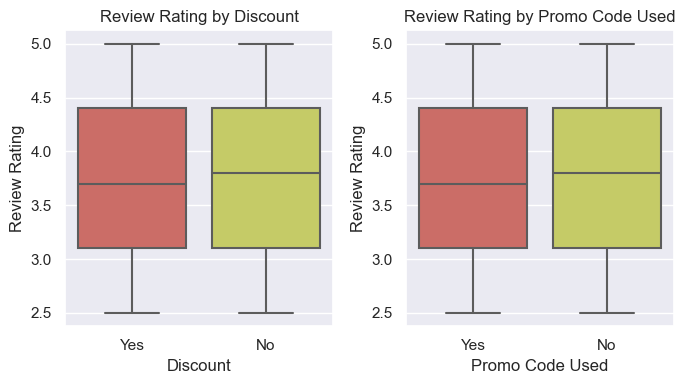

In [117]:
#discount impact on rating

fig=plt.figure(figsize=(7, 4))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Discount Applied', y='Review Rating', data=df,ax=ax1)
plt.title('Review Rating by Discount')
plt.xlabel('Discount')
plt.ylabel('Review Rating')
plt.xticks(rotation=0) 

ax2= fig.add_subplot(1,2,2)
sns.boxplot(x='Promo Code Used', y='Review Rating', data=df,ax=ax2)
plt.title('Review Rating by Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Review Rating')
plt.xticks(rotation=0) 
plt.autoscale()
plt.tight_layout()

The box plots compare review ratings based on whether a discount or promo code was used. Both discounts and promo codes appear to have a median review rating of around 4.0. The interquartile ranges are similar regardless of the discount or promo code usage, suggesting that pricing incentives do not significantly affect the median customer satisfaction.

The data suggests that while discounts and promo codes do not drastically alter the average customer satisfaction, they also do not detract from it. This implies that such pricing strategies could be employed without risking a decrease in perceived product quality or customer satisfaction. They may be effective tools for increasing sales volume or attracting new customers without negatively impacting brand reputation. However, specific probability calculations are still required to determine whether it is cost-effective to maintain the discount.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\4021463991.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=df1, ci=None)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\4021463991.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df2, ci=None,ax=ax2)


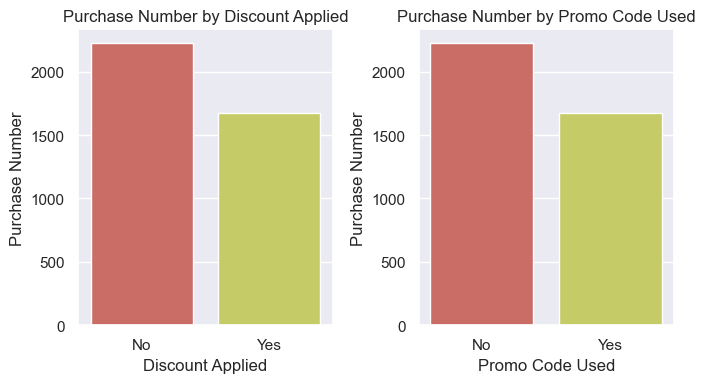

In [115]:
#discount Impact On Purchase Quantity
df1=df.groupby('Discount Applied')['Purchase Amount (USD)'].count()
df1=df1.reset_index()
df2=df.groupby('Promo Code Used')['Purchase Amount (USD)'].count()
df2=df2.reset_index()

fig=plt.figure(figsize=(7, 4))
ax1 = fig.add_subplot(1,2,1)
sns.barplot(x='Discount Applied', y='Purchase Amount (USD)', data=df1, ci=None)
plt.title('Purchase Number by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Number')

ax2= fig.add_subplot(1,2,2)
sns.barplot(x='Promo Code Used', y='Purchase Amount (USD)', data=df2, ci=None,ax=ax2)
plt.title('Purchase Number by Promo Code Used')
plt.xlabel('Promo Code Used')
plt.ylabel('Purchase Number')

plt.autoscale()
plt.tight_layout()

The bar charts compare the number of purchases made with and without discounts and promo codes. Purchases without discounts are higher than those with discounts. Similarly, the number of purchases made without the use of a promo code slightly exceeds the number made with a promo code.The similar purchase numbers probably suggest that while discounts and promo codes do incentivize some buyers, they are not the sole driving factor for a majority of purchases. 

However, it is also possible that the lower number of purchases was simply due to the company itself offering fewer opportunities for discounts and opportunities to use coupon codes. Further confirmation of the causal relationship is needed.

### 2.7 Payment Method

Text(0.5, 1.0, 'Payment Method Distribution')

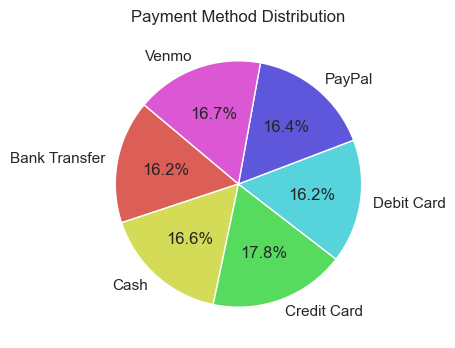

In [55]:
df1=df.groupby('Payment Method')['Purchase Amount (USD)'].count()
plt.figure(figsize=(4,4))
plt.pie(df1,labels=df1.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Distribution')

The pie chart displays a nearly uniform distribution of payment methods used for purchases, including Venmo, PayPal, Bank Transfer, Cash, Credit Card, and Debit Card. Credit Card payments have a slight edge at 17.8%, while the other methods range closely from 16.2% to 16.7%.

The diverse use of payment methods suggests that customers appreciate a variety of options to complete their transactions. While credit cards lead marginally, the even distribution underscores the importance of offering multiple payment options to cater to different customer preferences. This flexibility could be a factor in customer satisfaction and could potentially influence purchase decisions. Businesses should ensure their payment processing systems are equipped to handle this variety efficiently.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\723066215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby([ 'Agegroup','Payment Method'])['Purchase Amount (USD)'].count().unstack()


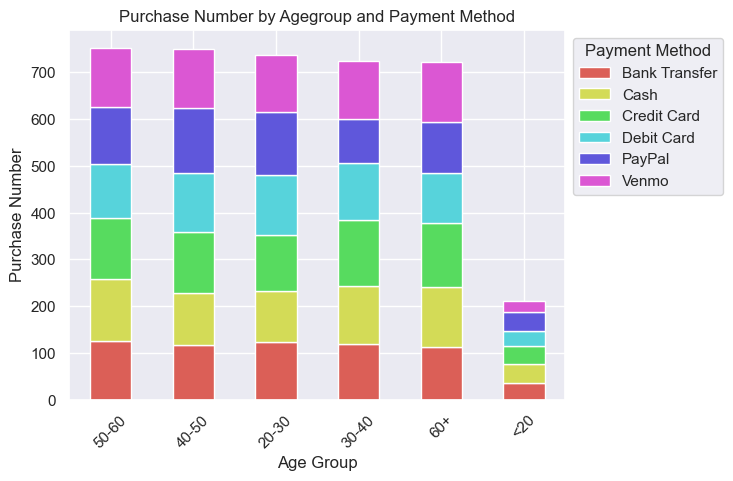

In [53]:
grouped_data = df.groupby([ 'Agegroup','Payment Method'])['Purchase Amount (USD)'].count().unstack()
sorted_grouped_data = grouped_data.sum(axis=1).sort_values(ascending=False)
grouped_data = grouped_data.reindex(sorted_grouped_data.index)
grouped_data.plot(kind='bar', stacked=True)
plt.title('Purchase Number by Agegroup and Payment Method')
plt.xlabel('Age Group')
plt.ylabel('Purchase Number')
plt.legend(title='Payment Method',loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45) 
plt.show()

The stacked bar chart shows the number of purchases made by different age groups using various payment methods. There is an even distribution of payment methods among the different age groups. 

In the 60+ age group, the distribution of payment methods is also not predominantly in non-digital payment methods such as CASH, as I assumed, suggesting that senior customers have a large acceptance of the diversity of payment methods and do not need to be taken care of by special strategies.

### 2.8 Customer Loyalty

Text(0.5, 1.0, 'Subscription Status Distribution')

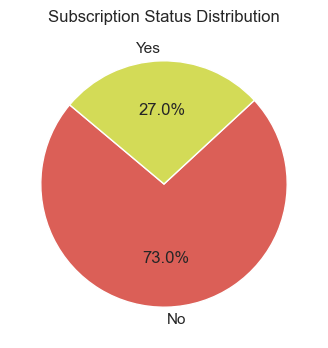

In [62]:
df1=df.groupby('Subscription Status')['Purchase Amount (USD)'].count()
plt.figure(figsize=(4,4))
plt.pie(df1,labels=df1.index, autopct='%1.1f%%', startangle=140)
plt.title('Subscription Status Distribution')

The pie chart displays the distribution of subscription status among customers, with 73% not subscribed and 27% holding a subscription.

This distribution indicates a significant opportunity to grow the subscription base. Marketing efforts could focus on highlighting the benefits of subscription to the large segment of non-subscribers. Additionally, analyzing the reasons behind the choice not to subscribe could inform strategies to convert one-time buyers into subscribers, potentially increasing customer lifetime value and ensuring a steady revenue stream.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9484\2233480711.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count2=sub.groupby('Agegroup')['Purchase Amount (USD)'].count()


Text(0.5, 1.0, 'Age Distribution for Subscription')

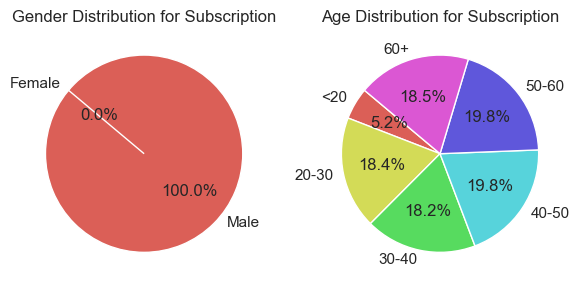

In [63]:
sub=df[df['Subscription Status']=='Yes']
count1=sub.groupby('Gender')['Purchase Amount (USD)'].count()
count1['Female']=0
count2=sub.groupby('Agegroup')['Purchase Amount (USD)'].count()

fig=plt.figure(figsize=(7, 4))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(count1,labels=count1.index,autopct='%1.1f%%',startangle=140)
plt.title('Gender Distribution for Subscription')

ax2 = fig.add_subplot(1,2,2)
ax2.pie(count2,labels=count2.index,autopct='%1.1f%%',startangle=140)
plt.title('Age Distribution for Subscription')

The pie charts represent the demographics of subscribers based on gender and age. The first chart shows that 100% of the subscribers are male, indicating that no female subscribers are present in the data set. The second chart shows a more balanced age distribution for subscriptions, with each age group from 20 years and above holding a relatively equal share of subscriptions, except for the under-20 age group, which has a significantly smaller portion.

The exclusive male subscriber base suggests a significant untapped market among female customers that the business could target for subscription growth. The uniform age distribution among subscribers above 20 years indicates that the subscription offering resonates across a broad age range, potentially allowing for age-inclusive marketing strategies. 

d:\ECA5307\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


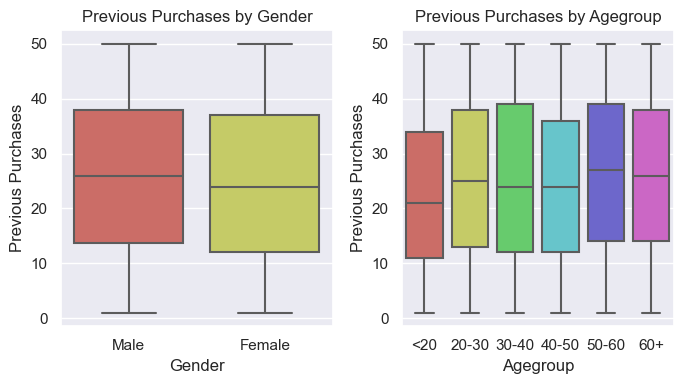

In [67]:
fig=plt.figure(figsize=(7, 4))
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Gender', y='Previous Purchases', data=df)
plt.title('Previous Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Previous Purchases')

ax2= fig.add_subplot(1,2,2)
sns.boxplot(x='Agegroup', y='Previous Purchases', data=df)
plt.title('Previous Purchases by Agegroup')
plt.xlabel('Agegroup')
plt.ylabel('Previous Purchases')

plt.autoscale()
plt.tight_layout()

The box plots display the distribution of previous purchases by customers, segmented by gender on the left and by age group on the right. Both genders have a similar median number of previous purchases, with males showing a slightly wider interquartile range. Regarding age groups, the distribution is fairly even across the board, with all age groups showing a similar median number of previous purchases, although the 50-60 age group has a slightly higher median.

The data suggests that gender does not significantly influence the frequency of previous purchases, implying that both male and female customers are equally engaged in terms of buying frequency. The consistent number of purchases across age groups indicates that the customer base is diverse and that all age segments are active purchasers. The slightly higher median in the 50-60 age group may reflect greater brand loyalty or financial stability in this demographic. Marketing strategies should continue to be inclusive, targeting all age groups and genders.

## 3. Summary and Suggestion

### Project Summary:
This project entailed a systematic analysis of a retail company's customer data, captured in the "shopping_trends.csv" file. The process began with data preprocessing, including the removal of duplicates and missing values. The data visualization step involved creating various charts to depict customer demographics, purchase behavior, and preferences related to payment methods, discounts, and subscriptions.

The visualizations covered a range of indicators including customer age and gender, product categories, color, and size, along with purchase-related data such as location, seasonality, ratings, discounts, and loyalty aspects like subscription status and history of previous purchases. The project concluded with a multi-indicator mixed analysis to draw comprehensive insights from the cross-referencing of these diverse data points.

### Suggestion:
Customer Segmentation: Focus marketing efforts on the most active age groups (20-40 years) while devising strategies to engage the under-20 and 60+ demographics more effectively.

Customer Gender: Watch out for men buying for women and develop special strategies such as Gift Purchasing to target this behavior.

Loyalty Programs: Given the uniformity in purchase frequency, develop or enhance loyalty programs to retain and grow the existing customer base, specifically targeting the male demographic which exclusively holds subscriptions.

Product Quality and Satisfaction: Address the lower ratings in the Clothing and Footwear categories with quality improvements and utilize the higher satisfaction in Accessories and Outerwear in marketing strategies.

Payment Flexibility: Maintain a variety of payment options to cater to all customer preferences, ensuring an efficient and user-friendly payment system.

Gender Inclusivity in Subscriptions: Investigate why there are no female subscribers and develop targeted subscription offerings that appeal to female customers.

Seasonal Inventory Management: Align stock levels with the consistent demand shown throughout the year, with an emphasis on the Fall season.

Promotions and Discounts: Utilize discounts and promo codes strategically to boost sales volumes without affecting customer satisfaction or the perceived value of the products.

Use of Data Analytics: Continue to employ data analytics for deeper insights into customer behavior and preferences, enabling data-driven decision-making for product development, marketing, and customer service improvements.